In [1]:
import pandas as pd

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [33]:
from utils.datasets import GhlKasperskyDataset, TepHarvardDataset

In [40]:
ds = GhlKasperskyDataset()
# ds = TepHarvardDataset()

In [41]:
ds.shake_not_stir()
gen = ds.train_series_generator()
train, anomaly = next(gen)

In [42]:
train

,input_temp_gc,rt_temp_gc,ht_temp_gc,ct_temp_gc,rt_level_m,ht_level_m,ct_level_m,input_flow,supply_flow,return_flow,output_flow,heater
time,,,,,,,,,,,,
0,10.0,10.149994,10.149994,0.149994,0.500000,0.1,0.010000,0,0,0,0,0
1,10.0,10.149994,10.919708,0.149994,0.500000,0.1,0.010000,0,0,0,0,0
2,10.0,10.138824,11.630157,0.149994,0.540177,0.1,0.010000,1,0,0,0,0
3,10.0,10.113220,12.286133,0.149994,0.660709,0.1,0.010000,1,0,0,0,0
4,10.0,10.095184,12.892090,0.149994,0.781241,0.1,0.010000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,1.0,19.181580,26.756561,57.287323,1.055918,0.6,10.993361,0,0,0,0,1
19997,1.0,19.181580,29.002167,57.287323,1.055918,0.6,10.993361,0,0,0,0,1
19998,1.0,19.181580,31.203278,57.287323,1.055918,0.6,10.993361,0,0,0,0,1


## Seaborn

<AxesSubplot:xlabel='time'>

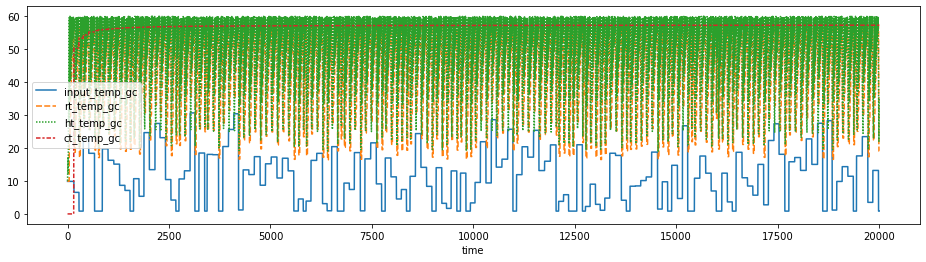

In [43]:
plt.figure(figsize=(16,4))
sns.lineplot(data=train[['input_temp_gc', 'rt_temp_gc', 'ht_temp_gc', 'ct_temp_gc']])

## Plotly express

In [ ]:
gen_test = ds.test_series_generator()

In [60]:
test, anomaly = next(gen_test)

In [63]:
fig = px.line(test[['input_temp_gc', 'rt_temp_gc', 'ht_temp_gc', 'ct_temp_gc']])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [62]:
fig = px.line(test[['rt_level_m', 'ht_level_m', 'ct_level_m']])
fig.show()

In [66]:
df = px.data.tips()
fig = px.bar(df, x="size", y="total_bill", color="sex", facet_row="smoker")
fig.show()

## Plotly graph_objects

In [73]:
all_columns = train.columns
clm_types = ('_m', '_gc')
clm_subsets = []
for t in clm_types:
    clm_subsets.append([c for c in all_columns if c.endswith(t)])
clm_subsets.append([c for c in all_columns if not c.endswith(clm_types)])
clm_subsets

[['rt_level_m', 'ht_level_m', 'ct_level_m'],
 ['input_temp_gc', 'rt_temp_gc', 'ht_temp_gc', 'ct_temp_gc'],
 ['input_flow', 'supply_flow', 'return_flow', 'output_flow', 'heater']]

In [74]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [85]:
fig = make_subplots(rows=len(clm_subsets))
fig.add_trace(go.Scatter(x=test.index, y=test['rt_level_m']), row=1, col=1)
fig.add_trace(go.Scatter(x=test.index, y=test['input_temp_gc']), row=2, col=1)
fig.add_trace(go.Scatter(x=test.index, y=test['input_flow']), row=3, col=1)
fig.update_xaxes(matches='x')
fig.show()